In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [5]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000):
        self.lr = lr
        self.num_iter = num_iter
        
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))  
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):

        self.theta = np.zeros(X.shape[1])
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient

    def predict_prob(self, X):
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [4]:
data_xls = pd.read_excel('ex2data1-logistic.xls', index_col=None)
data_xls.to_csv('data1.csv', encoding='utf-8')
data1 = pd.read_csv("data1.csv") 

x1 = data1['x1']
x2 = data1['x2']
y = data1['y']

x1 = (x1 - np.mean(x1))/np.std(x1)
x2 = (x2 - np.mean(x2))/np.std(x2)

In [6]:
model = LogisticRegression(lr=0.1, num_iter=100)

x_input = np.c_[np.ones((len(x1),1)),x1,x2]

xTrain, xTest, yTrain, yTest = train_test_split(x_input, y, test_size = 0.1, random_state = 0)
theta = np.zeros((x_input.shape[1], 1))
model.fit(xTrain, yTrain)

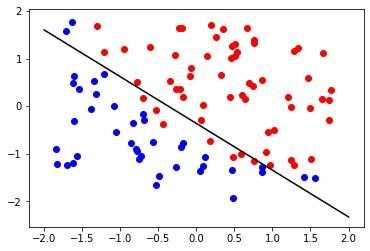

In [7]:
t = model.theta

xval = np.linspace(-2,2,1000)
yval = ((-t[0] - t[1]*xval)/t[2])  

plt.plot(xval,yval,'black')

for i in range(len(x1)):
    if(y[i]==1):
        plt.scatter(x1[i],x2[i],color='red')
    else:
        plt.scatter(x1[i],x2[i],color='blue')

In [8]:
preds = model.predict(xTrain,0.5)
print("Accuracy on Train Dataset:",(preds == yTrain).mean()*100,"%")

preds = model.predict(xTest,0.5)
print("Accuracy on Test Dataset :",(preds == yTest).mean()*100,"%")


Accuracy on Train Dataset: 90.0 %
Accuracy on Test Dataset : 80.0 %


In [9]:
data_xls = pd.read_excel('ex2data2-logistic.xls', index_col=None)
data_xls.to_csv('data2.csv', encoding='utf-8')
data2 = pd.read_csv("data2.csv") 

x1 = data2['x1']
x2 = data2['x2']
y = data2['y']

x1 = (x1 - np.mean(x1))/np.std(x1)
x2 = (x2 - np.mean(x2))/np.std(x2)

In [10]:
model = LogisticRegression(lr=0.1, num_iter=100)

x_input = np.c_[np.ones((len(x1),1)),x1,x2,x1**2,x2**2, x1*x2]

xTrain, xTest, yTrain, yTest = train_test_split(x_input, y, test_size = 0.1, random_state = 0)

theta = np.zeros((x_input.shape[1], 1))
model.fit(x_input, y)

In [11]:
t = model.theta

xval = np.linspace(-2,2,1000)
c = t[0] + t[2]*xval + t[4]*xval*xval
b = t[1]*(1 + xval)
a = t[3]
D = (b*b) - (4*a*c)
yval1 = (-b + (D)**(0.5))/(2*a)
yval2 = (-b - (D)**(0.5))/(2*a)

/home/jui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/home/jui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


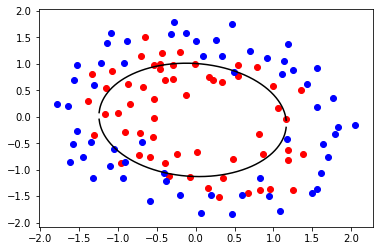

In [12]:
plt.plot(xval,yval1,'black')
plt.plot(xval,yval2,'black')

for i in range(len(x1)):
    if(y[i]==1):
        plt.scatter(x1[i],x2[i],color='red')
    else:
        plt.scatter(x1[i],x2[i],color='blue')
        

In [13]:
preds = model.predict(xTrain,0.4)
print("Accuracy on Train Dataset:",(preds == yTrain).mean()*100,"%")

preds = model.predict(xTest,0.4)
print("Accuracy on Test Dataset :",(preds == yTest).mean()*100,"%")


Accuracy on Train Dataset: 80.18867924528303 %
Accuracy on Test Dataset : 83.33333333333334 %
